In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

In [2]:
df = pd.read_csv('source/raw_vol2.0.csv')

In [3]:
df.head(1)

,MEET,RC_DATE,RC_NO,RC_DIST,RANK,WEATHER,TR_CON,TR_WC,ORD,CHUL_NO,...,BU_2F-G_TIME,BU_3F-G_TIME,BU_1F-G_TIME,BU_S1F_ACC_TIME,BU_G8F_ACC_TIME,BU_G6F_ACC_TIME,BU_G4F_ACC_TIME,BU_G3F_ACC_TIME,BU_G2F_ACC_TIME,BU_G1F_ACC_TIME
0,제주,20230701,1,800,제6등급,흐림,포화,18,1,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.groupby(['MEET', 'RANK'])['RC_NO'].count()

MEET  RANK
부산경남  국1등급     1320
      국2등급     1734
      국3등급     1809
      국4등급     3504
      국5등급     7689
      국6등급    10414
제주    제1등급     1248
      제2등급     1839
      제3등급     2916
      제4등급     4574
      제5등급     6410
      제6등급     6653
      한1등급      934
      한2등급     1372
      한3등급     1166
      한4등급     1167
Name: RC_NO, dtype: int64

In [5]:
df2 = df.loc[:, ['RC_DIST', 'ORD', 'AGE', 'horse_weight', 'weight_gain', 'RC_TIME', 'WG_BUDAM', 'JK_AGE', 'JK_CAREER', 'TR_CAREER']]

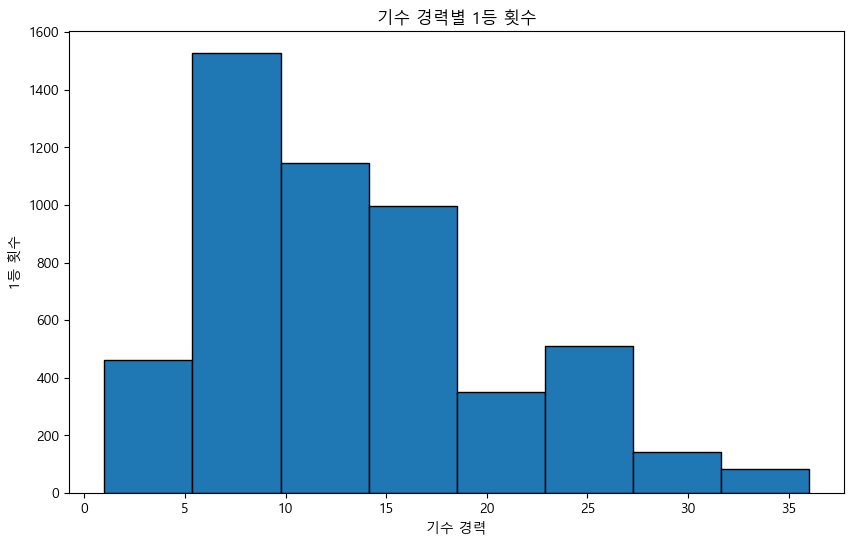

In [6]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# ORD가 1인 행들만 필터링
ord_1_df = df[df['ORD'] == 1]


plt.figure(figsize=(10, 6))
plt.hist(ord_1_df['JK_CAREER'], bins=8, edgecolor='black')
plt.xlabel('기수 경력')  # x축 라벨
plt.ylabel('1등 횟수')  # y축 라벨
plt.title('기수 경력별 1등 횟수')  # 제목
plt.show()

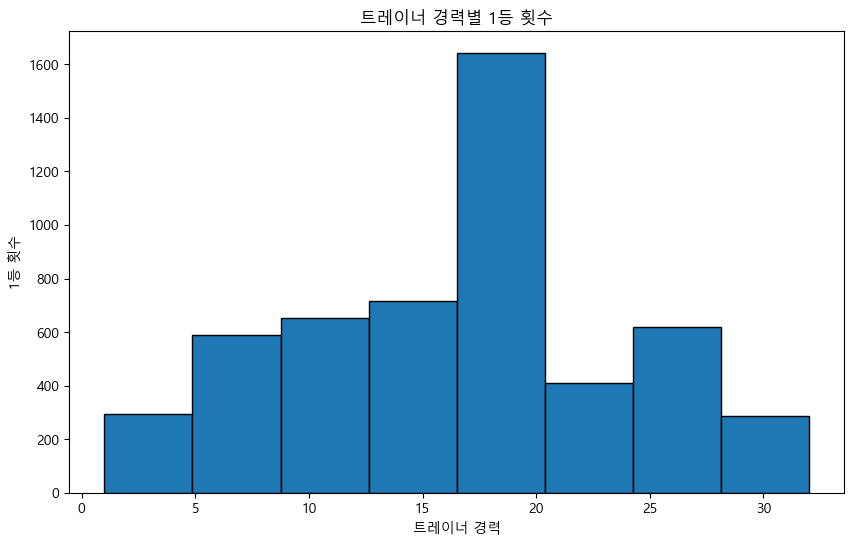

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# ORD가 1인 행들만 필터링
ord_1_df = df[df['ORD'] == 1]


plt.figure(figsize=(10, 6))
plt.hist(ord_1_df['TR_CAREER'], bins=8, edgecolor='black')
plt.xlabel('트레이너 경력')  # x축 라벨
plt.ylabel('1등 횟수')  # y축 라벨
plt.title('트레이너 경력별 1등 횟수')  # 제목
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [17]:
# 기수 경력을 5년 단위로 구간화
indices = list(range(0, 31, 5))
df['JCC'] = pd.cut(df['JK_CAREER'], bins=indices, include_lowest=True)  # include_lowest=True로 최소값 포함

# 카이제곱 검정을 위한 교차표 생성 (구간화된 JCC 사용)
contingency_table = pd.crosstab(df['ORD'], df['JCC'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)


Chi-square test statistic: 689.2775089005069
p-value: 4.24471588758243e-105
Degrees of freedom: 65
Expected frequencies: [[ 665.47644655 1725.55505583 1068.95813371 1037.24554645  326.00539706
   166.7594204 ]
 [ 656.80791568 1703.07788576 1055.03382937 1023.73433192  321.75883377
   164.5872035 ]
 [ 648.27274683 1680.94651831 1041.32374509 1010.43098222  317.57760222
   162.44840533]
 [ 647.33921273 1678.5259     1039.82420462 1008.97592835  317.12028002
   162.21447428]
 [ 644.40524844 1670.91824244 1035.11136315 1004.40290189  315.68298168
   161.4792624 ]
 [ 637.07033771 1651.89909854 1023.32925947  992.97033575  312.08973582
   159.64123272]
 [ 641.07119811 1662.27317703 1029.75586148  999.20628092  314.0496881
   160.64379436]
 [ 633.46956335 1642.56242789 1017.54531766  987.3579851   310.32577876
   158.73892724]
 [ 595.59475156 1544.35448484  956.70681867  928.32437083  291.77156378
   149.24801032]
 [ 525.31297053 1362.11650599  843.81284343  818.7796007   257.34173527
   131.

In [18]:
contingency_table

JCC,"(-0.001, 5.0]","(5.0, 10.0]","(10.0, 15.0]","(15.0, 20.0]","(20.0, 25.0]","(25.0, 30.0]"
ORD,,,,,,
1,461,1855,1056,1091,380,147
2,540,1774,1092,1015,359,145
3,571,1760,1043,984,354,149
4,611,1698,1048,1005,326,166
5,627,1700,1026,1012,292,175
6,699,1623,1001,972,323,159
7,655,1612,1064,957,346,173
8,639,1672,1007,932,314,186
9,587,1552,909,917,302,199


In [21]:
# 기수 경력을 5년 단위로 구간화
indices = list(range(0, 31, 5))
df['TRC'] = pd.cut(df['TR_CAREER'], bins=indices, include_lowest=True)  # include_lowest=True로 최소값 포함

# 카이제곱 검정을 위한 교차표 생성 (구간화된 JCC 사용)
contingency_table = pd.crosstab(df['ORD'], df['TRC'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)


Chi-square test statistic: 963.7783823383041
p-value: 3.930171145438816e-160
Degrees of freedom: 65
Expected frequencies: [[ 486.14416171  501.44816202  947.49196849 1907.47897521  393.06096996
   781.37576261]
 [ 483.81857672  499.04936675  942.95941772 1898.3541007   391.18067032
   777.63786779]
 [ 477.13251989  492.15283033  929.92833423 1872.12008649  385.77480887
   766.89142019]
 [ 474.90383427  489.85398486  925.58463974 1863.37541509  383.97285505
   763.30927099]
 [ 472.57824929  487.45518959  921.05208896 1854.25054058  382.09255541
   759.57137617]
 [ 472.67514866  487.55513939  921.24094525 1854.63074369  382.17090123
   759.72712179]
 [ 470.2526643   485.05639432  916.51953819 1845.12566607  380.21225577
   755.83348135]
 [ 463.46970809  478.0599081   903.29959842 1818.51144876  374.7280485
   744.93128813]
 [ 440.40765696  454.27185497  858.35180323 1728.02310989  356.08174376
   707.86383118]
 [ 391.18277473  403.49735501  762.4128118  1534.87993281  316.28206811
   628

In [22]:
contingency_table

TRC,"(-0.001, 5.0]","(5.0, 10.0]","(10.0, 15.0]","(15.0, 20.0]","(20.0, 25.0]","(25.0, 30.0]"
ORD,,,,,,
1,540,586,1103,1669,410,709
2,519,535,1028,1757,382,772
3,488,523,926,1756,413,818
4,459,497,966,1800,384,795
5,459,459,988,1738,442,791
6,440,481,879,1845,417,816
7,479,422,848,1862,403,839
8,447,461,859,1830,405,781
9,450,424,793,1677,377,824
